In [1]:
# Tom Bresee
# Initial model - Random Forest Regressor
# Data:  Baseline (no loc features)
# Goal:  Tuning RandomForestRegressor scikit-learn mode

<br>

In [89]:
#  much of these results are consolidated into .txt file 
#  MACH_L_basemodel.txt in this directory)

<br>

In [2]:
# this notebook rendered in .html:

<br>

*Utility Functions:*

In [31]:

def my_columns(df):
    """Print out columns from input dataframe"""
    for col in df.columns:
        print(col)
              
            
def my_null_per_col(column_name):
    print(df[column_name].isna().sum())
      
        
def my_null_all():
    """NaN for entire dataframe"""
    print(df.isna().sum())
    
    
def my_dup_rows_count():
    print(df.duplicated().sum())  
    # 1863 ? 
    
    
def kill_kolumns(list_of_columns):
    df.drop(list_of_columns, axis=1, inplace=True) 
    
    
def is_categorical(col):
    return df[col].dtype.name == 'object'


def quick_vc_bar(col):
    """ 
    input column
    output histogram of counts
    """
    print('Value Counts Histogram:', col)
    df[col].value_counts().plot(kind='bar', 
                                color='navy',
                                alpha=0.6,
                                figsize=(8,6))
    
def sort_my_df(df):
    df = df.sort_values(by='month', 
                              ascending=True).reset_index(drop=True)

    
def replace_values_in_col(col, mapping_dict):
    replace_values = mapping_dict
    df = df.replace({col: replace_values})

    
def the_columns(df):
    """sorted list of df columns"""
    for c in sorted(list(df.columns)):
        print(c)
        

def encode_and_bind(my_original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(my_original_dataframe[[feature_to_encode]])
    resulting_df = pd.concat([my_original_dataframe, dummies], axis=1)
    return(resulting_df)

# remove original feature at same time (slight variation):
# def encode_and_bind(original_dataframe, feature_to_encode):
#     dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#     res = pd.concat([original_dataframe, dummies], axis=1)
#     res = res.drop([feature_to_encode], axis=1)
#     return(res) 

# total number of NaNs completed summed in a pd df:
# df.isnull().sum().sum()

# df.transaction_id.value_counts()
# print(df.duplicated().sum())
# print(df.duplicated(keep='last'))
# print(df.duplicated().sum())
# 
# limit to categorical data using df.select_dtypes()
# X = X.select_dtypes(include=[object])

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit_transform()
# ohe.fit_transform(  df[['sex']])
# ohe.categories_

In [32]:
# --------------------------------------------------------------------------
from mycreds import creds_tom
# --------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# --------------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
# --------------------------------------------------------------------------
import glob  
from datetime import datetime as dt
import pandas_profiling
from pandas_profiling import ProfileReport
# from bokeh.layouts import column
# from bokeh.models import Div, TeX
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# --------------------------------------------------------------------------
import fiona
from sqlalchemy import create_engine
# output_notebook() # bokeh
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
cm = sns.light_palette("blue", as_cmap=True)
# correlations.style.set_caption('Correlation Values Ranked').background_gradient(cmap=cm)
# --------------------------------------------------------------------------
from pprint import pprint
import shap
shap.initjs()

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
import yellowbrick
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

<br>

*Read in previously downloaded .pkl of entire raw dataset*

## Random Forest Regressor

In [7]:
df_ml_3 = pd.read_pickle('use_this_data_for_gridsearch.pkl')  

In [8]:
df_ml_3.head(1).T

,0
flat_model_2-Room,0.00
flat_model_Adjoined Flat,0.00
flat_model_Apartment,0.00
flat_model_Dbss,0.00
flat_model_Improved,1.00
flat_model_Improved-Maisonette,0.00
flat_model_Maisonette,0.00
flat_model_Model A,0.00
flat_model_Model A-Maisonette,0.00
flat_model_Model A2,0.00


In [9]:
df_ml_3.tail(1).T

,863976
flat_model_2-Room,0.00
flat_model_Adjoined Flat,0.00
flat_model_Apartment,0.00
flat_model_Dbss,0.00
flat_model_Improved,0.00
flat_model_Improved-Maisonette,0.00
flat_model_Maisonette,0.00
flat_model_Model A,1.00
flat_model_Model A-Maisonette,0.00
flat_model_Model A2,0.00


### We need to tune hyper-parameters to stop overfitting...

*THIS IS IMPORTANT TO DO RIGHT*

n_estimators = n of trees 

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before 
the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [23]:

# ill do it in this type of form:
# from sklearn.model_selection import GridSearchCV
# # parameters for GridSearchCV
# param_grid2 = {"n_estimators": [10, 18, 22],
#               "max_depth": [3, 5],
#               "min_samples_split": [15, 20],
#               "min_samples_leaf": [5, 10, 20],
#               "max_leaf_nodes": [20, 40],
#               "min_weight_fraction_leaf": [0.1]}
# grid_search = GridSearchCV(model2, param_grid=param_grid2)
# grid_search.fit(train_X, np.log1p(train_y['visitors'].values))


def grid_search_model(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    param_grid = [{'n_estimators': [60], 
        'max_features': [10, 20, 22, 24, 26, 28, 30],
        'max_depth': [10, 20, 25, 30, 35, 40], 
        'min_samples_leaf': [1,2,3,4,5,10], 
        'bootstrap': [True, False]}]
            
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [24]:

# {'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 50}


In [25]:

grid_search_model(df_ml_3)

# --- Test Set ---
# Mean Absolute Error: ... 8.36483037097664
# Mean Squared Error:..... 130.53
# RMSE: .................. 11.425164080573788
# Coeff of det (R^2):..... 0.633
# Score .................. 0.6325333027861018
# --- Val Set ---
# Mean Absolute Error: ... 6.107622067257306
# Mean Squared Error:..... 72.91
# RMSE: .................. 8.538690998417009
# Coeff of det (R^2):..... 0.807
# Score .................. 0.8069477816917059
# --- Train Set ---
# Mean Absolute Error: ... 2.5799769958716667
# Mean Squared Error:..... 14.41
# RMSE: .................. 3.7966178831363036
# Coeff of det (R^2):..... 0.931
# Score .................. 0.9309251476030125



# 6.135952513703719 {'max_features': 5, 'n_estimators': 10}
# 6.068959633342858 {'max_features': 5, 'n_estimators': 20}
# 6.108645920244199 {'max_features': 10, 'n_estimators': 10}
# 6.030829315398504 {'max_features': 10, 'n_estimators': 20}
# Best:

# RandomForestRegressor(criterion='mse', max_features=10, n_estimators=20,
#                       n_jobs=-1, random_state=42)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.1s finished


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.6s


nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 8, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 8, 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.7s finished
invalid value encountered in sqrt


### TEST 1

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:

def model_base_2_random_forest(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    
    y = df['price_per_sq_m_per_lease_yr_norm'].values

    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]

    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               n_estimators=200,
                               max_depth=25, 
                               max_features=30,
                               min_samples_leaf=2,
                               
                               n_jobs=-1)   
    
    # {'max_depth': 25, 'max_features': 30, 
    # 'min_samples_leaf': 2, 'n_estimators': 50}
    
    rfModel = rf.fit(X_train, y_train)
    
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
        
    print('\n')

    print('--- Test Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
        
    print('Score ..................', rfModel.score(X_test, y_test))
    
    print('\n')

    print('--- Val Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
        
    print('Score ..................', rfModel.score(X_val, y_val))
        
    print('\n')

    print('--- Train Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
              
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
          
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
        
    print('Score ..................', rfModel.score(X_train, y_train))
        
    print('\n\n')
    
    print('sns.distplot((y_test-y_pred_test)):')
    
    sns.distplot((y_test-y_pred_test))
    
    # guess vs reality plot horizontal 
    #     plt.figure(figsize=(12,8))
    #     plt.plot(y_test, color='red')
    #     plt.plot(y_pred, color='blue')
    #     plt.show()

    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    # Print the feature ranking
    print("\nFeature ranking:")
        
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
            
    # Look at parameters used by our current forest
    print('\nParameters currently in use:')
    pprint(rfModel.get_params())


In [27]:
model_base_2_random_forest(df_ml_3)



--- Test Set ---
Mean Absolute Error: ... 7.487166321057101
Mean Squared Error:..... 107.28
RMSE: .................. 10.3576543617115
Coeff of det (R^2):..... 0.698
Score .................. 0.6979937553658649


--- Val Set ---
Mean Absolute Error: ... 5.755302496095892
Mean Squared Error:..... 63.58
RMSE: .................. 7.973994824469478
Coeff of det (R^2):..... 0.832
Score .................. 0.8316379906029259


--- Train Set ---
Mean Absolute Error: ... 2.9300816383192045
Mean Squared Error:..... 17.59
RMSE: .................. 4.194195414209678
Coeff of det (R^2):..... 0.916
Score .................. 0.9157007890514987



sns.distplot((y_test-y_pred_test)):


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



Feature ranking:
1. remaining_lease_years (0.365178)
2. region_Central (0.129509)
3. lease_commence_date (0.112364)
4. floor_area_sqm (0.091859)
5. n_rooms (0.050984)
6. region_North (0.023816)
7. region_West (0.016736)
8. storey_range_avg (0.013166)
9. storey_range_min (0.013095)
10. town_Clementi (0.013029)
11. storey_range_max (0.011638)
12. town_Jurong West (0.011325)
13. flat_type_3 Room (0.011209)
14. town_Marine Parade (0.010116)
15. town_Woodlands (0.009850)
16. flat_type_4 Room (0.007995)
17. region_East (0.007337)
18. flat_model_Standard (0.007158)
19. flat_model_Improved (0.006855)
20. town_Central Area (0.006128)
21. town_Geylang (0.005761)
22. flat_type_5 Room (0.005402)
23. town_Bukit Merah (0.005038)
24. town_Ang Mo Kio (0.004922)
25. region_North-East (0.004528)
26. flat_model_Terrace (0.004196)
27. town_Queenstown (0.003959)
28. flat_model_New Generation (0.003447)
29. town_Toa Payoh (0.003310)
30. town_Tampines (0.003148)
31. flat_type_Executive (0.002913)
32. town_B

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [ ]:

def model_base_2_random_forest(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    
    y = df['price_per_sq_m_per_lease_yr_norm'].values

    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]

    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               n_estimators=200,
                               max_depth=25, 
                               max_features=30,
                               min_samples_leaf=2,
                               
                               n_jobs=-1)   
    
    # {'max_depth': 25, 'max_features': 30, 
    # 'min_samples_leaf': 2, 'n_estimators': 50}
    
    rfModel = rf.fit(X_train, y_train)
    
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
        
    print('\n')

    print('--- Test Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
        
    print('Score ..................', rfModel.score(X_test, y_test))
    
    print('\n')

    print('--- Val Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
        
    print('Score ..................', rfModel.score(X_val, y_val))
        
    print('\n')

    print('--- Train Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
              
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
          
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
        
    print('Score ..................', rfModel.score(X_train, y_train))
        
    print('\n\n')
    
    print('sns.distplot((y_test-y_pred_test)):')
    
    sns.distplot((y_test-y_pred_test))
    
    # guess vs reality plot horizontal 
    #     plt.figure(figsize=(12,8))
    #     plt.plot(y_test, color='red')
    #     plt.plot(y_pred, color='blue')
    #     plt.show()

    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    # Print the feature ranking
    print("\nFeature ranking:")
        
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
            
    # Look at parameters used by our current forest
    print('\nParameters currently in use:')
    pprint(rfModel.get_params())


In [ ]:
model_base_2_random_forest(df_ml_3)    

## REBUILD:

In [37]:

import numpy as np

def grid_search_model_updated_2(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    # rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [80], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [2,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           # 'bootstrap': [True, False]
            }]
        
    grid_search_rf = GridSearchCV(estimator = rf, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  # scoring='neg_mean_squared_error')
                                 )
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    

In [90]:
# this took about 14 hours to run: 

In [38]:
grid_search_model_updated_2(df_ml_3)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished
invalid value encountered in sqrt


nan {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': 80}
nan {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.2, 'n_estimators': 80}
nan {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.30000000000000004, 'n_estimators': 80}
nan {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.4, 'n_estimators': 80}
nan {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.5, 'n_estimators': 80}
0.18722101469928387 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.6, 'n_estimators': 80}
0.29697424852344656 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.7000000000000001, 'n_estimators': 80}
0.29697424852344645 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 0.8, 'n_estimators': 80}
0.2969742

0.2969742485234468 {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 0.9, 'n_estimators': 80}
0.2969742485234466 {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 1.0, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.1, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.2, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.30000000000000004, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.4, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.5, 'n_estimators': 80}
nan {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 0.6, 'n_estimators': 80}
0.29697424852344695 {'max_depth': 

In [ ]:

# use use use ! 

# Best Parms:
# {'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 0.1, 'n_estimators': 80}



In [39]:

# def grid_search_model_GOLD(df):
    
#     X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
#     X = X_initial.values
#     y = df['price_per_sq_m_per_lease_yr_norm'].values
#     eighty_percent = 0.8 * len(df)
#     ninety_percent = 0.9 * len(df)
#     X_train= X[:round(eighty_percent)]
#     X_val  = X[round(eighty_percent):round(ninety_percent)]
#     X_test = X[round(ninety_percent):]
#     y_train= y[:round(eighty_percent)]
#     y_val  = y[round(eighty_percent):round(ninety_percent)]
#     y_test = y[round(ninety_percent):]
    
#     rf = RandomForestRegressor(random_state=42, 
#                                verbose=1, 
#                                criterion='mse',
#                                n_estimators=100,
#                                n_jobs=-1)  
    
#     rfm = rf.fit(X_train, y_train)

#     #     param_grid = [
#     #     {     'n_estimators': [50], 
#     #            'max_features': [10,15, 20, 25,30],
#     #            'max_depth': [10, 15, 20, 25], 
#     #            'min_samples_leaf': [2,4,6,8], 
#     #           # 'bootstrap': [True, False]} 
#     #     }]

#     # trying:
#     #     param_grid = [{'n_estimators': [60], 
#     #         'max_features': [10, 20, 22, 24, 26, 28, 30],
#     #         'max_depth': [10, 20, 25, 30, 35, 40], 
#     #         'min_samples_leaf': [1,2,3,4,5,10], 
#     #         'bootstrap': [True, False]}]
    
#     param_grid = [
#     {     'n_estimators': [100], 
#             # max_features': [10, 20, 22, 24, 26, 28, 30],
#             # "max_features"      : ["auto", "sqrt", "log2"],
#            'max_features' : ["auto", "sqrt", "log2"],
#            'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
#            'min_samples_leaf': [1,2,3,4,5,10], 
#            'min_samples_split' : np.linspace(0.1, 1.0, 10),
#            'bootstrap': [True, False]}
        
#     grid_search_rf = GridSearchCV(estimator = rfm, 
#                                   param_grid = param_grid, 
#                                   cv=5, 
#                                   n_jobs = -1,
#                                   verbose=1,
#                                   return_train_score=True,
#                                   scoring='neg_mean_squared_error')
    
#     grid_search_rf.fit(X_train, y_train)
    
#     cvres = grid_search_rf.cv_results_
#     for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#         print(np.sqrt(-mean_score), params)
    
#     #find the best model of grid search
#     print('Best:')
#     print(grid_search_rf.best_estimator_)
    
#     print('Best Parms:')
#     print(grid_search_rf.best_params_)
    
    
#     # Look at parameters used by our current forest
#     # print('\nParameters currently in use:')
#     # pprint(grid_search_rf.get_params())
    
    

In [91]:

# # {'max_depth': 35, 'max_features': 'sqrt', 
# #  'min_samples_leaf': 2, 'min_samples_split': 0.1, 

# def model_base_random_forest(df):
    
#     X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
#     X = X_initial.values
    
#     y = df['price_per_sq_m_per_lease_yr_norm'].values

#     eighty_percent = 0.8 * len(df)
#     ninety_percent = 0.9 * len(df)
    
#     X_train= X[:round(eighty_percent)]
#     X_val  = X[round(eighty_percent):round(ninety_percent)]
#     X_test = X[round(ninety_percent):]

#     y_train= y[:round(eighty_percent)]
#     y_val  = y[round(eighty_percent):round(ninety_percent)]
#     y_test = y[round(ninety_percent):]
    
#     rf = RandomForestRegressor(random_state=42, 
#                                n_estimators=200,
#                                max_depth=35, 
#                                max_features='sqrt', 
#                                min_samples_leaf=2, 
#                                min_samples_split=0.1,
#                                n_jobs=-1)                  
    
#     rfModel = rf.fit(X_train, y_train)
    
#     y_pred_test = rfModel.predict(X_test)
#     y_pred_train = rfModel.predict(X_train)
#     y_pred_val = rfModel.predict(X_val)
    
        
#     print('\n')

#     print('--- Test Set ---')
    
#     print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))

#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
   
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
        
#     print('Score ..................', rfModel.score(X_test, y_test))
    
#     print('\n')

#     print('--- Val Set ---')
    
#     print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))

#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
   
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
        
#     print('Score ..................', rfModel.score(X_val, y_val))
        
#     print('\n')

#     print('--- Train Set ---')
    
#     print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
              
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
          
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
   
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
        
#     print('Score ..................', rfModel.score(X_train, y_train))
        
#     print('\n\n')
    
#     print('sns.distplot((y_test-y_pred_test)):')
    
#     sns.distplot((y_test-y_pred_test))
    
#     # guess vs reality plot horizontal 
#     #     plt.figure(figsize=(12,8))
#     #     plt.plot(y_test, color='red')
#     #     plt.plot(y_pred, color='blue')
#     #     plt.show()

#     plt.figure(figsize = (5,5), dpi=100)
#     plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
#     plt.xlabel('Y Test')
#     plt.ylabel('Predicted Y')
#     plt.show()
    
#     importances = rfModel.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     columns = np.array(list(X_initial))
#     # print(importances)
    
#     # Print the feature ranking
#     print("\nFeature ranking:")
        
#     for f in range(X_train.shape[1]):
#         print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
            
#     # Look at parameters used by our current forest
#     print('\nParameters currently in use:')
#     pprint(rfModel.get_params())


In [93]:
# model_base_random_forest(df_ml_3)

In [23]:

# from sklearn.model_selection import GridSearchCV
# # parameters for GridSearchCV
# param_grid2 = {"n_estimators": [10, 18, 22],
#               "max_depth": [3, 5],
#               "min_samples_split": [15, 20],
#               "min_samples_leaf": [5, 10, 20],
#               "max_leaf_nodes": [20, 40],
#               "min_weight_fraction_leaf": [0.1]}
# grid_search = GridSearchCV(model2, param_grid=param_grid2)
# grid_search.fit(train_X, np.log1p(train_y['visitors'].values))

# https://www.kaggle.com/code/ksjpswaroop/parameter-tuning-random-forest-gridsearchcv/notebook

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [23]:

def grid_search_model_updated(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfm = rf.fit(X_train, y_train)

    #     param_grid = [
    #     {     'n_estimators': [50], 
    #            'max_features': [10,15, 20, 25,30],
    #            'max_depth': [10, 15, 20, 25], 
    #            'min_samples_leaf': [2,4,6,8], 
    #           # 'bootstrap': [True, False]} 
    #     }]

    # trying:
    #     param_grid = [{'n_estimators': [60], 
    #         'max_features': [10, 20, 22, 24, 26, 28, 30],
    #         'max_depth': [10, 20, 25, 30, 35, 40], 
    #         'min_samples_leaf': [1,2,3,4,5,10], 
    #         'bootstrap': [True, False]}]
    
    param_grid = [
    {     'n_estimators': [100], 
            # max_features': [10, 20, 22, 24, 26, 28, 30],
            # "max_features"      : ["auto", "sqrt", "log2"],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth': [1,5,10, 20, 25, 30, 35, 40], 
           'min_samples_leaf': [1,2,3,4,5,10], 
           'min_samples_split' : np.linspace(0.1, 1.0, 10),
           'bootstrap': [True, False]}
        
    grid_search_rf = GridSearchCV(estimator = rfm, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    
    
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(grid_search_rf.get_params())
    
    

In [252]:

def model_base_random_forest(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    
    y = df['price_per_sq_m_per_lease_yr_norm'].values

    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]

    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               # n_estimators=50,
                               # max_depth=8,
                               n_jobs=-1)                   
    
    rfModel = rf.fit(X_train, y_train)
    
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
        
    print('\n')

    print('--- Test Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
        
    print('Score ..................', rfModel.score(X_test, y_test))
    
    print('\n')

    print('--- Val Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))

    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
        
    print('Score ..................', rfModel.score(X_val, y_val))
        
    print('\n')

    print('--- Train Set ---')
    
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
              
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
          
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
        
    print('Score ..................', rfModel.score(X_train, y_train))
        
    print('\n\n')
    
    print('sns.distplot((y_test-y_pred_test)):')
    
    sns.distplot((y_test-y_pred_test))
    
    # guess vs reality plot horizontal 
    #     plt.figure(figsize=(12,8))
    #     plt.plot(y_test, color='red')
    #     plt.plot(y_pred, color='blue')
    #     plt.show()

    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    # Print the feature ranking
    print("\nFeature ranking:")
        
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
            
    # Look at parameters used by our current forest
    print('\nParameters currently in use:')
    pprint(rfModel.get_params())


Scenario = `All initial features included`



--- Test Set ---
Mean Absolute Error: ... 8.357162271222794
Mean Squared Error:..... 130.55
RMSE: .................. 11.425767101909685
Coeff of det (R^2):..... 0.632
Score .................. 0.632494511902248


--- Val Set ---
Mean Absolute Error: ... 6.100667344213111
Mean Squared Error:..... 72.70
RMSE: .................. 8.526359567451005
Coeff of det (R^2):..... 0.808
Score .................. 0.8075049844491826


--- Train Set ---
Mean Absolute Error: ... 2.580256332763297
Mean Squared Error:..... 14.41
RMSE: .................. 3.796519720505646
Coeff of det (R^2):..... 0.931
Score .................. 0.9309287194565808



sns.distplot((y_test-y_pred_test)):


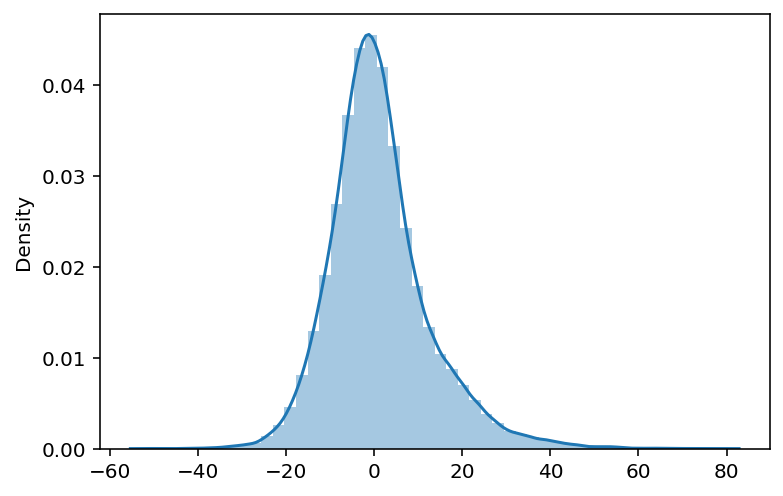

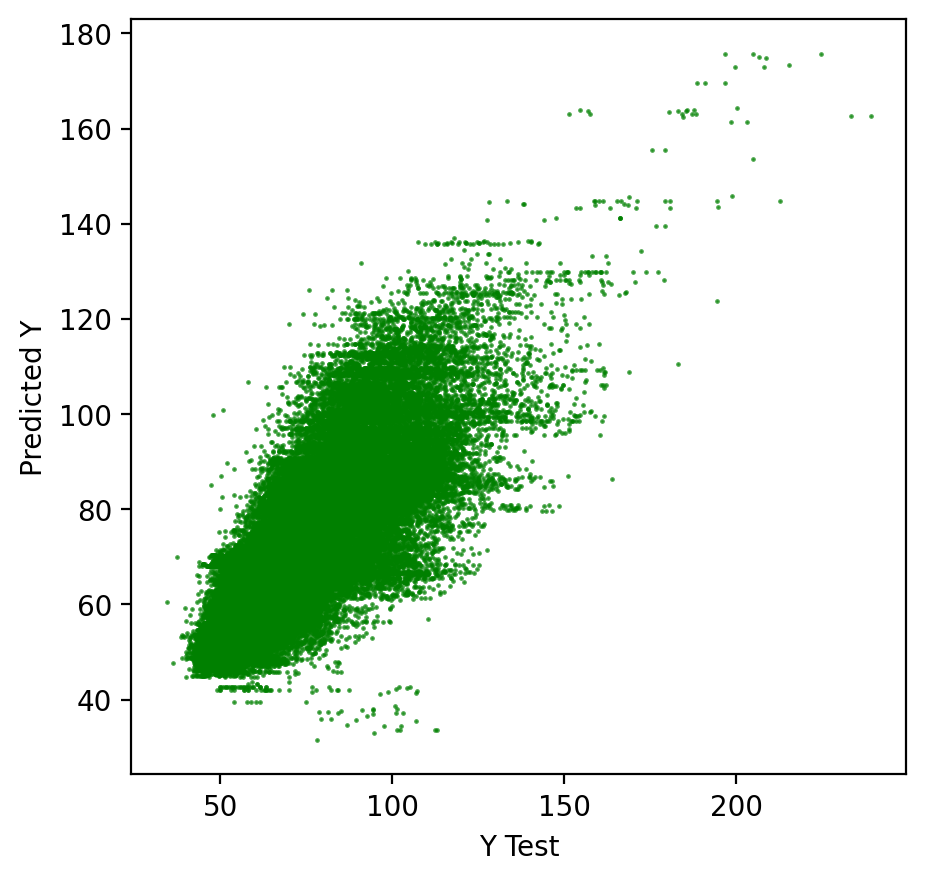


Feature ranking:
1. remaining_lease_years (0.390043)
2. lease_commence_date (0.123677)
3. region_Central (0.100067)
4. floor_area_sqm (0.091946)
5. n_rooms (0.089017)
6. region_North (0.019850)
7. region_West (0.012137)
8. storey_range_avg (0.011040)
9. storey_range_min (0.010964)
10. town_Clementi (0.010806)
11. town_Marine Parade (0.008809)
12. region_East (0.008231)
13. town_Jurong West (0.007884)
14. storey_range_max (0.007747)
15. town_Central Area (0.006557)
16. flat_type_Executive (0.005931)
17. town_Tampines (0.005580)
18. town_Geylang (0.005375)
19. town_Bukit Merah (0.004739)
20. flat_model_Terrace (0.004724)
21. flat_type_4 Room (0.004690)
22. flat_model_Improved (0.004671)
23. town_Queenstown (0.004370)
24. flat_model_Standard (0.003910)
25. town_Choa Chu Kang (0.003879)
26. town_Ang Mo Kio (0.003822)
27. town_Woodlands (0.003804)
28. town_Jurong East (0.003732)
29. town_Toa Payoh (0.002838)
30. town_Bukit Batok (0.002778)
31. flat_model_New Generation (0.002671)
32. town_

In [253]:
model_base_random_forest(df_ml_2)

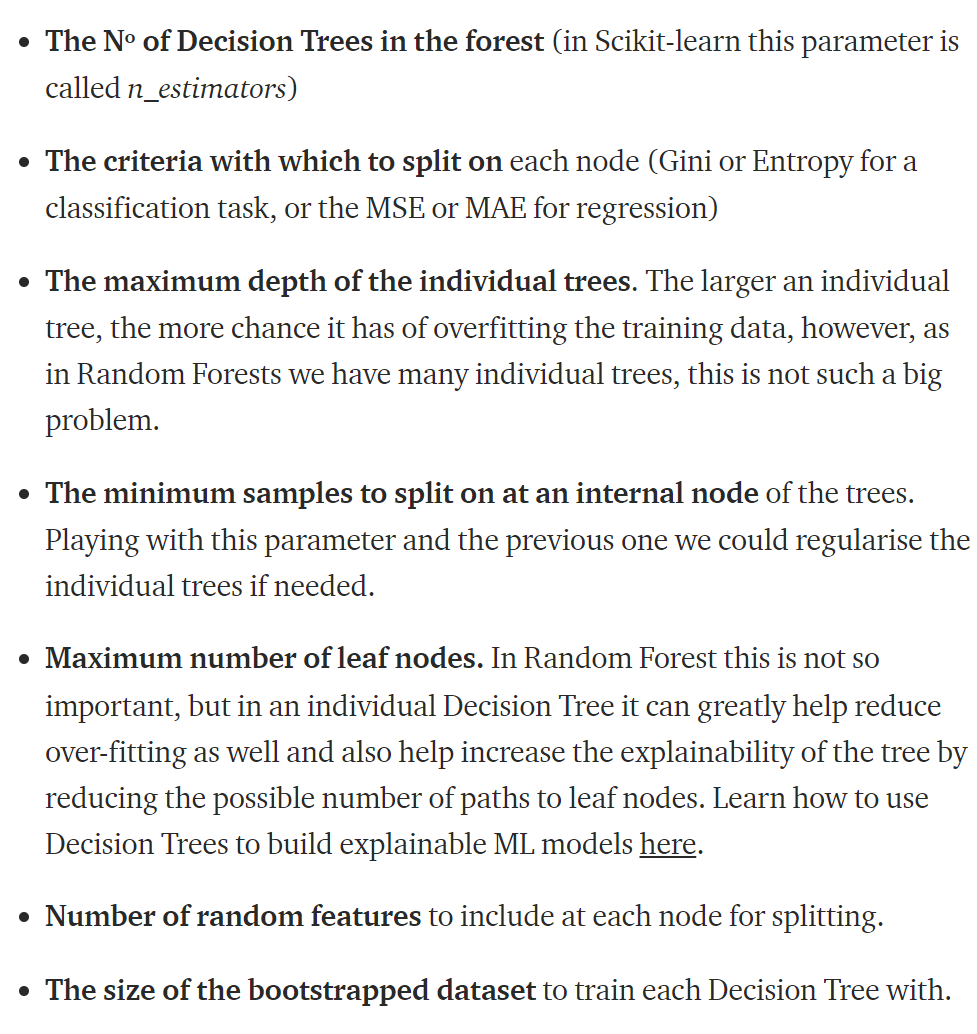

```
Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  
 'max_features': 'auto',  If “auto”, then max_features=n_features.

 'max_depth': None, The maximum depth of the tree. 
  If None, then nodes are expanded until all leaves
  are pure or until all leaves contain less than min_samples_split samples.
  
 'max_leaf_nodes': None,
 
 'max_samples': None,
 
 'min_samples_leaf': 1,
 
 'min_samples_split': 2,
 
 'min_weight_fraction_leaf': 0.0,
 
 'n_estimators': 100,
 
 'oob_score': False,
 
 'warm_start': False}
```

In [258]:

def model_2(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               n_estimators=200,
                               # max_depth=8,
                               n_jobs=-1)                   
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('\n')
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('\n')
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n\n')
    print('sns.distplot((y_test-y_pred_test)):')
    sns.distplot((y_test-y_pred_test))
    #     guess vs reality plot horizontal 
    #         plt.figure(figsize=(12,8))
    #         plt.plot(y_test, color='red')
    #         plt.plot(y_pred, color='blue')
    #         plt.show()
    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    # Print the feature ranking
    print("\nFeature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))  
    # Look at parameters used by our current forest
    print('\nParameters currently in use:')
    pprint(rfModel.get_params())
    
    # the power of 24 cores... 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.5min finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    5.6s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    7.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Do



--- Test Set ---
Mean Absolute Error: ... 8.356261372059944
Mean Squared Error:..... 130.50
RMSE: .................. 11.423510264354874
Coeff of det (R^2):..... 0.633


[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.


Score .................. 0.632639678221052


--- Val Set ---
Mean Absolute Error: ... 6.103635470304361
Mean Squared Error:..... 72.78
RMSE: .................. 8.531157779679036
Coeff of det (R^2):..... 0.807


[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.4s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.5s finished


Score .................. 0.8072882701956348


--- Train Set ---
Mean Absolute Error: ... 2.5774123848898305
Mean Squared Error:..... 14.38
RMSE: .................. 3.7917507298223283
Coeff of det (R^2):..... 0.931


[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    5.9s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    7.3s finished


Score .................. 0.9311021379713629



sns.distplot((y_test-y_pred_test)):


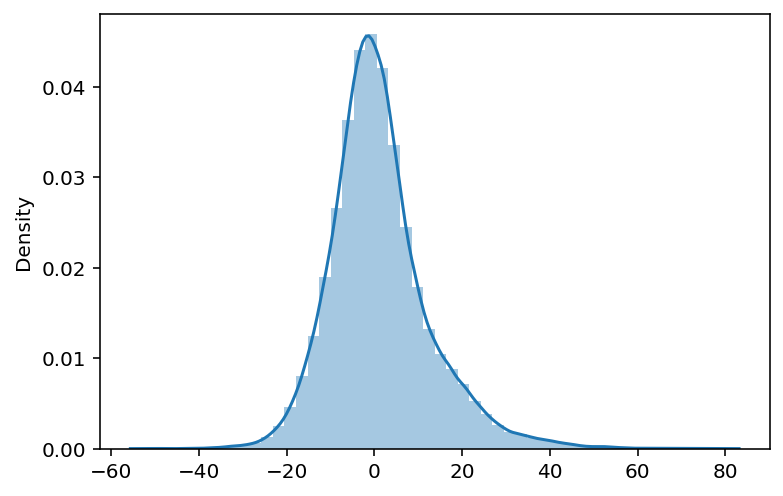

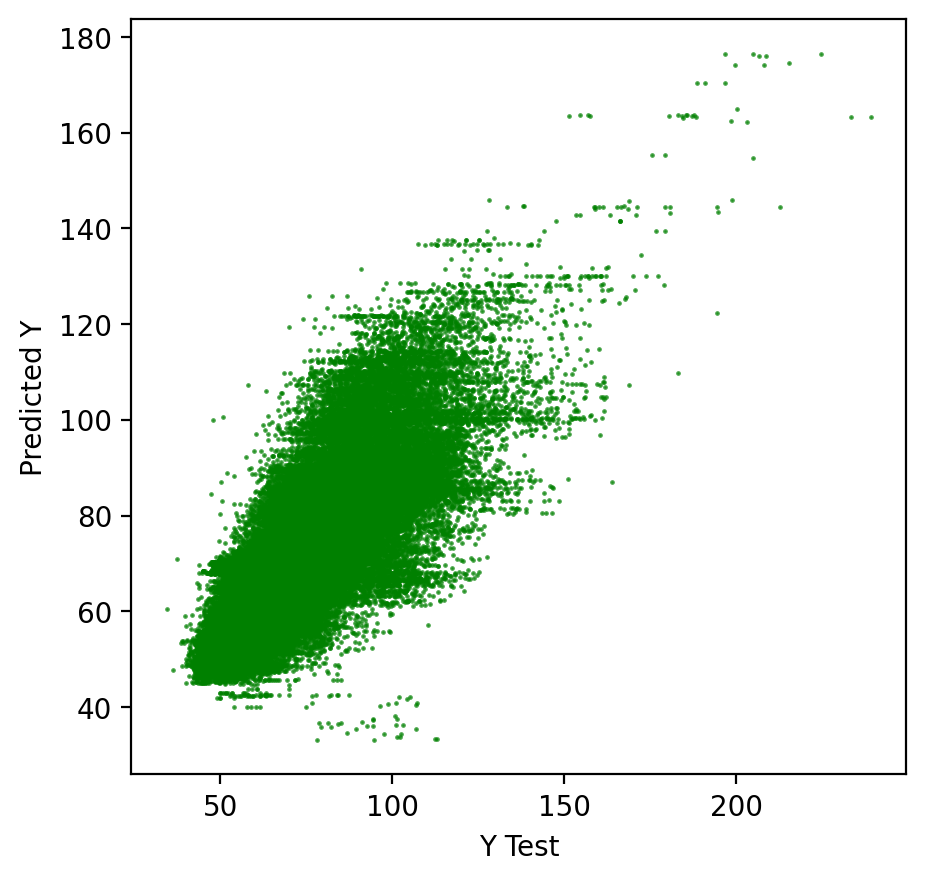


Feature ranking:
1. remaining_lease_years (0.390297)
2. lease_commence_date (0.123621)
3. region_Central (0.100155)
4. floor_area_sqm (0.092152)
5. n_rooms (0.089322)
6. region_North (0.020013)
7. storey_range_avg (0.013814)
8. storey_range_min (0.013564)
9. region_West (0.012346)
10. town_Clementi (0.010803)
11. storey_range_max (0.010517)
12. town_Marine Parade (0.008834)
13. region_East (0.008119)
14. town_Jurong West (0.007711)
15. town_Central Area (0.006561)
16. flat_type_Executive (0.005892)
17. town_Tampines (0.005620)
18. town_Geylang (0.005370)
19. town_Bukit Merah (0.004758)
20. flat_model_Terrace (0.004742)
21. flat_model_Improved (0.004643)
22. flat_type_4 Room (0.004484)
23. town_Queenstown (0.004414)
24. flat_model_Standard (0.003883)
25. town_Choa Chu Kang (0.003860)
26. town_Ang Mo Kio (0.003842)
27. town_Jurong East (0.003730)
28. town_Woodlands (0.003692)
29. town_Toa Payoh (0.002823)
30. town_Bukit Batok (0.002777)
31. flat_model_New Generation (0.002674)
32. town_

In [259]:
model_2(df_ml_3)

In [264]:

def model_4(df,num_of_trees):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               n_estimators=num_of_trees,
                               # max_depth=8,
                               n_jobs=-1)                   
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('\n')
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('\n')
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # print('sns.distplot((y_test-y_pred_test)):')
    # sns.distplot((y_test-y_pred_test))
    #     guess vs reality plot horizontal 
    #         plt.figure(figsize=(12,8))
    #         plt.plot(y_test, color='red')
    #         plt.plot(y_pred, color='blue')
    #         plt.show()
    
    
    #     plt.figure(figsize = (5,5), dpi=100)
    #     plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    #     plt.xlabel('Y Test')
    #     plt.ylabel('Predicted Y')
    #     plt.show()
    
    # importances = rfModel.feature_importances_
    # indices = np.argsort(importances)[::-1]
    # columns = np.array(list(X_initial))
    # print(importances)
    # Print the feature ranking
    # print("\nFeature ranking:")
    #for f in range(X_train.shape[1]):
    #     print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))  
    # Look at parameters used by our current forest
    # print('\nParameters currently in use:')
    # pprint(rfModel.get_params())
    
    # the power of 24 cores... 

In [265]:
for t in [50, 100, 150, 200]:
    model_4(df_ml_3, t)



--- Test Set ---
Mean Absolute Error: ... 8.355100423102133
Mean Squared Error:..... 130.54
RMSE: .................. 11.425428863486163
Coeff of det (R^2):..... 0.633
Score .................. 0.6325162702027491


--- Val Set ---
Mean Absolute Error: ... 6.114654172641649
Mean Squared Error:..... 73.15
RMSE: .................. 8.552997227068902
Coeff of det (R^2):..... 0.806
Score .................. 0.806300337520173


--- Train Set ---
Mean Absolute Error: ... 2.5854649420762077
Mean Squared Error:..... 14.49
RMSE: .................. 3.8059622247752354
Coeff of det (R^2):..... 0.931
Score .................. 0.9305847112724661




--- Test Set ---
Mean Absolute Error: ... 8.364830370976637
Mean Squared Error:..... 130.53
RMSE: .................. 11.425164080573786
Coeff of det (R^2):..... 0.633
Score .................. 0.6325333027861018


--- Val Set ---
Mean Absolute Error: ... 6.107622067257304
Mean Squared Error:..... 72.91
RMSE: .................. 8.538690998417009
Coeff of det (

> You are ok it appears to assume number of estimators (trees) of default 100 will get the job done...

Scenario = `Assume 100 trees, criterion of 'mse', base`

In [266]:

def model_5(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)                 
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')


In [267]:
model_5(df_ml_3)



--- Test Set ---
Mean Absolute Error: ... 8.364830370976637
Mean Squared Error:..... 130.53
RMSE: .................. 11.425164080573788
Coeff of det (R^2):..... 0.633
Score .................. 0.6325333027861018


--- Val Set ---
Mean Absolute Error: ... 6.107622067257306
Mean Squared Error:..... 72.91
RMSE: .................. 8.538690998417009
Coeff of det (R^2):..... 0.807
Score .................. 0.8069477816917059


--- Train Set ---
Mean Absolute Error: ... 2.5799769958716667
Mean Squared Error:..... 14.41
RMSE: .................. 3.796617883136303
Coeff of det (R^2):..... 0.931
Score .................. 0.9309251476030125




Scenario = `Assume 100 trees, criterion of 'mse', iterate over min samples leaf`

In [270]:
#   min samples leaf, followed by max features and number of estimators

#   The minimum number of samples required to be at a leaf node. 
#   A split point at any depth will only be considered if it leaves 
#   at least min_samples_leaf training samples in each of the left 
#   and right branches. This may have the effect of smoothing the model, 
#   especially in regression.

n_estimators = n of trees 

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [273]:

def model_6(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)                 
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    visualizer = PredictionError()
    
    
    # print(dir(rfModel))


In [274]:
model_6(df_ml_3)



--- Test Set ---
Mean Absolute Error: ... 8.364830370976636
Mean Squared Error:..... 130.53
RMSE: .................. 11.425164080573788
Coeff of det (R^2):..... 0.633
Score .................. 0.6325333027861018
--- Val Set ---
Mean Absolute Error: ... 6.107622067257306
Mean Squared Error:..... 72.91
RMSE: .................. 8.538690998417009
Coeff of det (R^2):..... 0.807
Score .................. 0.8069477816917059
--- Train Set ---
Mean Absolute Error: ... 2.5799769958716667
Mean Squared Error:..... 14.41
RMSE: .................. 3.796617883136303
Coeff of det (R^2):..... 0.931
Score .................. 0.9309251476030125


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', 

In [275]:
l = ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_compute_partial_dependence_recursion', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'estimators_', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_features_', 'n_features_in_', 'n_jobs', 'n_outputs_', 'oob_score', 'predict', 'random_state', 'score', 'set_params', 'verbose', 'warm_start']
for c in l: print(c)

__abstractmethods__
__annotations__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_abc_impl
_check_feature_names
_check_n_features
_compute_oob_predictions
_compute_partial_dependence_recursion
_estimator_type
_get_oob_predictions
_get_param_names
_get_tags
_make_estimator
_more_tags
_repr_html_
_repr_html_inner
_repr_mimebundle_
_required_parameters
_set_oob_score_and_attributes
_validate_X_predict
_validate_data
_validate_estimator
_validate_y_class_weight
apply
base_estimator
base_estimator_
bootstrap
ccp_alpha
class_weight
criterion
decision_path
estimator_params
estimators_
feature_importances_
fit
get_params
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_sp

In [289]:

def model_7(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    visualizer = PredictionError(rfModel, hist=False)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
    visualizer2 = ResidualsPlot(rfModel, hist=False)
    visualizer2.fit(X_train, y_train)  
    visualizer2.score(X_test, y_test)
    visualizer2.poof()
    
    # print(dir(rfModel))




--- Test Set ---
Mean Absolute Error: ... 8.364830370976637
Mean Squared Error:..... 130.53
RMSE: .................. 11.425164080573788
Coeff of det (R^2):..... 0.633
Score .................. 0.6325333027861018
--- Val Set ---
Mean Absolute Error: ... 6.107622067257306
Mean Squared Error:..... 72.91
RMSE: .................. 8.538690998417009
Coeff of det (R^2):..... 0.807
Score .................. 0.8069477816917059
--- Train Set ---
Mean Absolute Error: ... 2.5799769958716667
Mean Squared Error:..... 14.41
RMSE: .................. 3.7966178831363036
Coeff of det (R^2):..... 0.931
Score .................. 0.9309251476030125




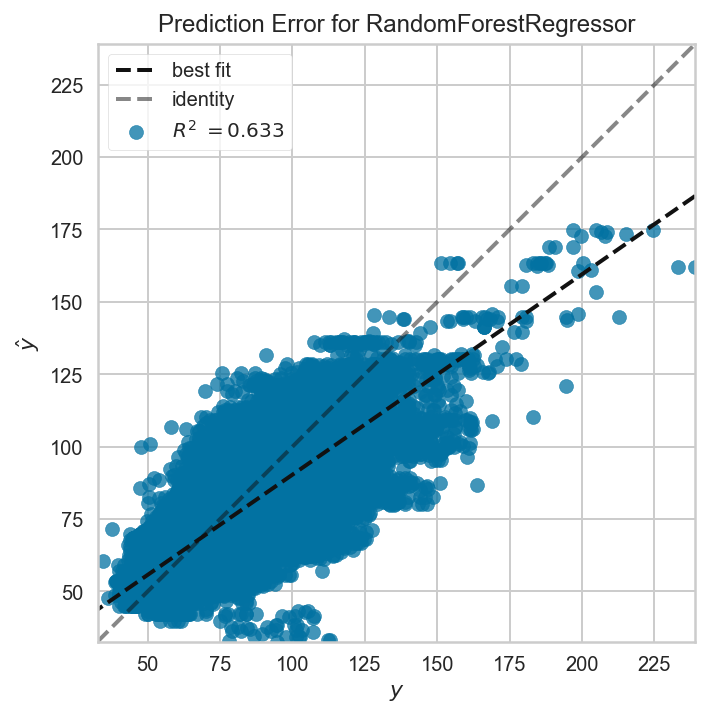

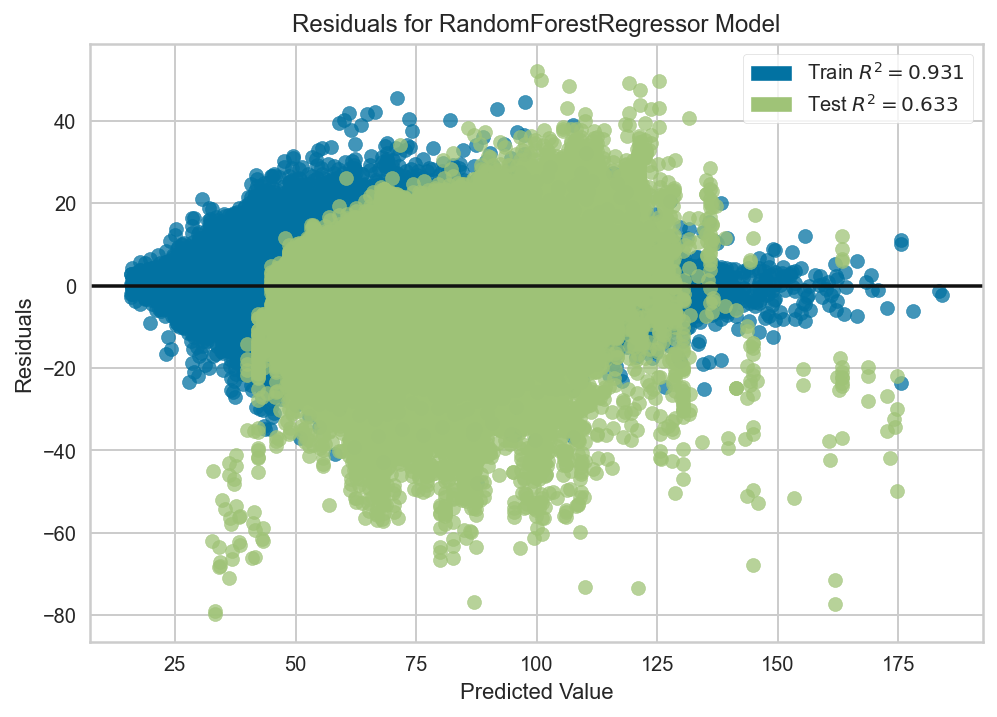

In [290]:
model_6(df_ml_3)

### We need to tune hyper-parameters to stop overfitting...

*THIS IS IMPORTANT TO DO RIGHT*

In [310]:

def grid_search_model(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)   
    
    # rfModel = rf.fit(X_train, y_train)
    
#     y_pred_test = rfModel.predict(X_test)
#     y_pred_train = rfModel.predict(X_train)
#     y_pred_val = rfModel.predict(X_val)
    
#     print('\n')
#     print('--- Test Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
#     print('Score ..................', rfModel.score(X_test, y_test))
#     print('--- Val Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
#     print('Score ..................', rfModel.score(X_val, y_val))
#     print('--- Train Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
#     print('Score ..................', rfModel.score(X_train, y_train))
#     print('\n')

    #     visualizer = PredictionError(rfModel, hist=False)
    #     visualizer.fit(X_train, y_train)
    #     visualizer.score(X_test, y_test)
    #     visualizer.poof()
    #     visualizer2 = ResidualsPlot(rfModel, hist=False)
    #     visualizer2.fit(X_train, y_train)  
    #     visualizer2.score(X_test, y_test)
    #     visualizer2.poof()

    
    #   Min Samples Leaf: 1–60

    #   Max Features: 0.1–1.0
    
    param_grid = [
    {   # 'n_estimators': [10, 20], 
          #      'max_features': [0.2, 0.4]    #  0.6, 0.8, 1.0], 
          'max_depth': [4,5,6,7,8],
          # 'min_samples_leaf': [10, 20, 30, 40, 50]
          # 'bootstrap': [True, False]} 
    }]
    
    grid_search_rf = GridSearchCV(estimator = rf, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  # scoring='neg_mean_squared_error'
                                  )
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_forest.cv_results_
    
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Parms:')
    print(grid_search_rf.best_params_)
    

In [311]:

grid_search_model(df_ml_3)

# --- Test Set ---
# Mean Absolute Error: ... 8.36483037097664
# Mean Squared Error:..... 130.53
# RMSE: .................. 11.425164080573788
# Coeff of det (R^2):..... 0.633
# Score .................. 0.6325333027861018
# --- Val Set ---
# Mean Absolute Error: ... 6.107622067257306
# Mean Squared Error:..... 72.91
# RMSE: .................. 8.538690998417009
# Coeff of det (R^2):..... 0.807
# Score .................. 0.8069477816917059
# --- Train Set ---
# Mean Absolute Error: ... 2.5799769958716667
# Mean Squared Error:..... 14.41
# RMSE: .................. 3.7966178831363036
# Coeff of det (R^2):..... 0.931
# Score .................. 0.9309251476030125


# 6.135952513703719 {'max_features': 5, 'n_estimators': 10}
# 6.068959633342858 {'max_features': 5, 'n_estimators': 20}
# 6.108645920244199 {'max_features': 10, 'n_estimators': 10}
# 6.030829315398504 {'max_features': 10, 'n_estimators': 20}
# Best:

# RandomForestRegressor(criterion='mse', max_features=10, n_estimators=20,
#                       n_jobs=-1, random_state=42)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [16]:
dir(RandomForestRegressor)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'decision_path',
 'feature_importances_

```
--- Test Set ---
Mean Absolute Error: ... 7.487166321057101
Mean Squared Error:..... 107.28
RMSE: .................. 10.3576543617115
Coeff of det (R^2):..... 0.698   *****************
Score .................. 0.6979937553658649


--- Val Set ---
Mean Absolute Error: ... 5.755302496095892
Mean Squared Error:..... 63.58
RMSE: .................. 7.973994824469478
Coeff of det (R^2):..... 0.832
Score .................. 0.8316379906029259


--- Train Set ---
Mean Absolute Error: ... 2.9300816383192045
Mean Squared Error:..... 17.59
RMSE: .................. 4.194195414209678
Coeff of det (R^2):..... 0.916
Score .................. 0.9157007890514987



sns.distplot((y_test-y_pred_test)):
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

Feature ranking:
1. remaining_lease_years (0.365178)
2. region_Central (0.129509)
3. lease_commence_date (0.112364)
4. floor_area_sqm (0.091859)
5. n_rooms (0.050984)
6. region_North (0.023816)
7. region_West (0.016736)
8. storey_range_avg (0.013166)
9. storey_range_min (0.013095)
10. town_Clementi (0.013029)
11. storey_range_max (0.011638)
12. town_Jurong West (0.011325)
13. flat_type_3 Room (0.011209)
14. town_Marine Parade (0.010116)
15. town_Woodlands (0.009850)
16. flat_type_4 Room (0.007995)
17. region_East (0.007337)
18. flat_model_Standard (0.007158)
19. flat_model_Improved (0.006855)
20. town_Central Area (0.006128)
21. town_Geylang (0.005761)
22. flat_type_5 Room (0.005402)
23. town_Bukit Merah (0.005038)
24. town_Ang Mo Kio (0.004922)
25. region_North-East (0.004528)
26. flat_model_Terrace (0.004196)
27. town_Queenstown (0.003959)
28. flat_model_New Generation (0.003447)
29. town_Toa Payoh (0.003310)
30. town_Tampines (0.003148)
31. flat_type_Executive (0.002913)
32. town_Bukit Batok (0.002780)
33. town_Jurong East (0.002713)
34. town_Choa Chu Kang (0.002598)
35. town_Kallang/Whampoa (0.002518)
36. town_Bishan (0.002489)
37. flat_model_Model A (0.002358)
38. town_Yishun (0.002344)
39. town_Serangoon (0.002070)
40. town_Bedok (0.002065)
41. town_Hougang (0.001616)
42. flat_model_Simplified (0.001607)
43. town_Bukit Panjang (0.001445)
44. flat_type_2 Room (0.001376)
45. town_Pasir Ris (0.001054)
46. flat_model_Maisonette (0.000917)
47. town_Sengkang (0.000737)
48. town_Bukit Timah (0.000632)
49. flat_model_Premium Apartment (0.000585)
50. flat_model_Apartment (0.000570)
51. flat_model_Adjoined Flat (0.000490)
52. flat_type_1 Room (0.000415)
53. town_Sembawang (0.000265)
54. flat_model_Model A-Maisonette (0.000099)
55. flat_model_Model A2 (0.000097)
56. town_Punggol (0.000077)
57. town_Lim Chu Kang (0.000040)
58. flat_model_Improved-Maisonette (0.000025)
59. flat_type_Multi Generation (0.000017)
60. flat_model_Multi Generation (0.000014)
61. flat_model_Premium Maisonette (0.000008)
62. flat_model_2-Room (0.000004)
63. flat_model_Dbss (0.000000)
64. flat_model_Type S1 (0.000000)
65. flat_model_Type S2 (0.000000)
66. flat_model_Premium Apartment Loft (0.000000)

Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
```

# RESULTS 2:

In [23]:

# from sklearn.model_selection import GridSearchCV
# # parameters for GridSearchCV
# param_grid2 = {"n_estimators": [10, 18, 22],
#               "max_depth": [3, 5],
#               "min_samples_split": [15, 20],
#               "min_samples_leaf": [5, 10, 20],
#               "max_leaf_nodes": [20, 40],
#               "min_weight_fraction_leaf": [0.1]}
# grid_search = GridSearchCV(model2, param_grid=param_grid2)
# grid_search.fit(train_X, np.log1p(train_y['visitors'].values))

# https://www.kaggle.com/code/ksjpswaroop/parameter-tuning-random-forest-gridsearchcv/notebook

def grid_search_model(df):
    
    # raw data is split into a train/test/val split of 80/10/10
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    # create random forest regressor instance
    rf = RandomForestRegressor(random_state=42, 
                               verbose=1, 
                               criterion='mse',
                               n_estimators=100,
                               n_jobs=-1)  
    
    # fit the model on the training data 
    rf_model = rf.fit(X_train, y_train)

    # my grid search parameters to permutate thru
    param_grid = [{'n_estimators': [60], 
        'max_features': [10, 20, 22, 24, 26, 28, 30],
        'max_depth': [10, 20, 25, 30, 35, 40], 
        'min_samples_leaf': [1,2,3,4,5,10], 
        'bootstrap': [True, False]}]
            
    grid_search_rf = GridSearchCV(estimator = rf_model, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"],
                                  cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best Estimator:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Paramters:)
    print(grid_search_rf.best_params_)
    

In [24]:

# {'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 5, 
# 'n_estimators': 50}


In [25]:

grid_search_model(df_ml_3)

# --- Test Set ---
# Mean Absolute Error: ... 8.36483037097664
# Mean Squared Error:..... 130.53
# RMSE: .................. 11.425164080573788
# Coeff of det (R^2):..... 0.633
# Score .................. 0.6325333027861018
# --- Val Set ---
# Mean Absolute Error: ... 6.107622067257306
# Mean Squared Error:..... 72.91
# RMSE: .................. 8.538690998417009
# Coeff of det (R^2):..... 0.807
# Score .................. 0.8069477816917059
# --- Train Set ---
# Mean Absolute Error: ... 2.5799769958716667
# Mean Squared Error:..... 14.41
# RMSE: .................. 3.7966178831363036
# Coeff of det (R^2):..... 0.931
# Score .................. 0.9309251476030125



# 6.135952513703719 {'max_features': 5, 'n_estimators': 10}
# 6.068959633342858 {'max_features': 5, 'n_estimators': 20}
# 6.108645920244199 {'max_features': 10, 'n_estimators': 10}
# 6.030829315398504 {'max_features': 10, 'n_estimators': 20}
# Best:

# RandomForestRegressor(criterion='mse', max_features=10, n_estimators=20,
#                       n_jobs=-1, random_state=42)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.1s finished


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.6s


nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 8, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 4, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 6, 'n_estimators': 50}
nan {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 8, 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.7s finished
invalid value encountered in sqrt


<br>

###  TEST:  train then grid search train, OR just grid search train ?

- does it make a difference in results ? 

```
from sklearn.model_selection import GridSearchCV

# parameters for GridSearchCV
param_grid2 = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}
grid_search = GridSearchCV(model2, param_grid=param_grid2)
grid_search.fit(train_X, np.log1p(train_y['visitors'].values))
'''
from operator import itemgetter

# Utility function to report best scores
def report(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
```  
        

In [23]:

def grid_search_model(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               # verbose=1, 
                               # criterion='mse',
                               n_jobs=-1)
    
    # fit the model on the training data 
    rf_model = rf.fit(X_train, y_train)

    param_grid = [{'n_estimators': [60], 
        'max_features': [10, 20, 22, 24, 26, 28, 30],
        'max_depth': [10, 20, 25, 30, 35, 40], 
        'min_samples_leaf': [1,2,3,4,5,10], 
        'bootstrap': [True, False]}]
            
    grid_search_rf = GridSearchCV(estimator = rf_model, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1,
                                  return_train_score=True,
                                  scoring='neg_mean_squared_error')
    
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"],
                                  cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    #find the best model of grid search
    print('Best Estimator:')
    print(grid_search_rf.best_estimator_)
    
    print('Best Paramters:)
    print(grid_search_rf.best_params_)
    

In [49]:
# https://www.kaggle.com/code/ksjpswaroop/parameter-tuning-random-forest-gridsearchcv/notebook

<br>

## TEST:  train then gridsearch vs gridsearch:

In [47]:

def grid_search_model(df):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               # verbose=1, 
                               # criterion='mse',
                               n_jobs=-1)
    
    # fit the model on the training data 
    rf_model = rf.fit(X_train, y_train)

    param_grid = [{'n_estimators': [60], 
        # 'max_features': [10, 20, 22, 24, 26, 28, 30],
        'max_depth': [1, 2, 10], 
        # 'min_samples_leaf': [1,2,3,4,5,10], 
        # 'bootstrap': [True, False]
                  }]
            
    grid_search_rf = GridSearchCV(estimator = rf_model, 
                                  param_grid = param_grid, 
                                  cv=5, 
                                  n_jobs = -1,
                                  verbose=1)
    
    # training first:
    grid_search_rf.fit(X_train, y_train)
    
    cvres = grid_search_rf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"],
                                  cvres["params"]):
        print(np.sqrt(-mean_score), params)
    
    # print('Best Estimator:')
    # print(grid_search_rf.best_estimator_)
    
    # print('Best Paramters:')
    print(grid_search_rf.best_params_)
          
    #     from operator import itemgetter

    #     def report(grid_scores, n_top):
    #         top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    #         for i, score in enumerate(top_scores):
    #             print("Model with rank: {0}".format(i + 1))
    #             print("Mean validation score: {0:.4f})".format(
    #               score.mean_validation_score,
    #               np.std(score.cv_validation_scores)))
    #             print("Parameters: {0}".format(score.parameters))
    #             print("")
    #      
    # report(grid_search_rf.grid_scores_,4)


In [48]:
grid_search_model(df_ml_3)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.18654657470647357 {'max_depth': 1, 'n_estimators': 60}
nan {'max_depth': 2, 'n_estimators': 60}
nan {'max_depth': 10, 'n_estimators': 60}
Best Estimator:
RandomForestRegressor(max_depth=10, n_estimators=60, n_jobs=-1, random_state=42)
Best Paramters:
{'max_depth': 10, 'n_estimators': 60}


invalid value encountered in sqrt


### TEST 11:

```
Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
```

In [60]:

def MACH_L(df):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? 
                               # ----------------------------
                               criterion='squared_error',
                               n_estimators=200,
                               bootstrap=True, 
                               max_depth=25,
                               max_features=30,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    pprint(rfModel.get_params())
    

In [61]:
MACH_L(df_ml_3)



--- Test Set ---
Mean Absolute Error: ... 7.487166321057101
Mean Squared Error:..... 107.28
RMSE: .................. 10.3576543617115
Coeff of det (R^2):..... 0.698
Score .................. 0.6979937553658649
--- Val Set ---
Mean Absolute Error: ... 5.755302496095894
Mean Squared Error:..... 63.58
RMSE: .................. 7.973994824469478
Coeff of det (R^2):..... 0.832
Score .................. 0.8316379906029259
--- Train Set ---
Mean Absolute Error: ... 2.9300816383192045
Mean Squared Error:..... 17.59
RMSE: .................. 4.194195414209678
Coeff of det (R^2):..... 0.916
Score .................. 0.9157007890514987


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'wa

### TEST 12:

In [64]:

# def MACH_L(df):
#     X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
#     X = X_initial.values
#     y = df['price_per_sq_m_per_lease_yr_norm'].values
#     eighty_percent = 0.8 * len(df)
#     ninety_percent = 0.9 * len(df)
#     X_train= X[:round(eighty_percent)]
#     X_val  = X[round(eighty_percent):round(ninety_percent)]
#     X_test = X[round(ninety_percent):]
#     y_train= y[:round(eighty_percent)]
#     y_val  = y[round(eighty_percent):round(ninety_percent)]
#     y_test = y[round(ninety_percent):]
    
#     rf = RandomForestRegressor(random_state=42, 
#                                verbose=0, 
#                                #  criterion='mse' ??? 
#                                # ----------------------------
#                                # criterion='squared_error',
#                                n_estimators=200,
#                                bootstrap=True, 
#                                max_depth=25,
#                                max_features=30,
#                                min_samples_leaf=2,
#                                min_samples_split=2,
#                                max_leaf_nodes=None,
#                                max_samples=None,
#                                min_weight_fraction_leaf=0.0,
#                                # ----------------------------
#                                n_jobs=-1)  
    
#     rfModel = rf.fit(X_train, y_train)
#     y_pred_test = rfModel.predict(X_test)
#     y_pred_train = rfModel.predict(X_train)
#     y_pred_val = rfModel.predict(X_val)
    
#     print('\n')
#     print('--- Test Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
#     print('Score ..................', rfModel.score(X_test, y_test))
#     print('--- Val Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
#     print('Score ..................', rfModel.score(X_val, y_val))
#     print('--- Train Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
#     print('Score ..................', rfModel.score(X_train, y_train))
#     print('\n')
    
#     # for now comment out:
#     # visualizer = PredictionError(rfModel, hist=False)
#     # visualizer.fit(X_train, y_train)
#     # visualizer.score(X_test, y_test)
#     # visualizer.poof()
    
#     # visualizer2 = ResidualsPlot(rfModel, hist=False)
#     # visualizer2.fit(X_train, y_train)  
#     # visualizer2.score(X_test, y_test)
#     # visualizer2.poof()
    
#     pprint(rfModel.get_params())
    

In [63]:
MACH_L(df_ml_3)



--- Test Set ---
Mean Absolute Error: ... 7.487166321057101
Mean Squared Error:..... 107.28
RMSE: .................. 10.3576543617115
Coeff of det (R^2):..... 0.698
Score .................. 0.6979937553658649
--- Val Set ---
Mean Absolute Error: ... 5.755302496095894
Mean Squared Error:..... 63.58
RMSE: .................. 7.973994824469478
Coeff of det (R^2):..... 0.832
Score .................. 0.8316379906029259
--- Train Set ---
Mean Absolute Error: ... 2.9300816383192045
Mean Squared Error:..... 17.59
RMSE: .................. 4.194195414209678
Coeff of det (R^2):..... 0.916
Score .................. 0.9157007890514987


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'wa

In [66]:

def MACH_L_ITERATOR(df, input_max_depth):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? 
                               # ----------------------------
                               # criterion='squared_error',
                               n_estimators=200,
                               bootstrap=True, 
                               max_depth=input_max_depth, # 25,
                               max_features=30,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    # pprint(rfModel.get_params())
    

In [69]:
# simple input thru max_depth:

for max_d in [20, 22, 24, 26, 28, 30, 32, 34, 36]:
    print('----------')
    print(max_d)
    MACH_L_ITERATOR(df_ml_3,max_d)
    

----------
20


--- Test Set ---
Mean Absolute Error: ... 7.481222871523612
Mean Squared Error:..... 107.11
RMSE: .................. 10.349239852373783
Coeff of det (R^2):..... 0.698
Score .................. 0.6984842529309379
--- Val Set ---
Mean Absolute Error: ... 5.752900655355272
Mean Squared Error:..... 63.70
RMSE: .................. 7.980972553078632
Coeff of det (R^2):..... 0.831
Score .................. 0.8313432077646359
--- Train Set ---
Mean Absolute Error: ... 3.184833228047599
Mean Squared Error:..... 20.15
RMSE: .................. 4.488701511444148
Coeff of det (R^2):..... 0.903
Score .................. 0.9034465845540146


----------
22


--- Test Set ---
Mean Absolute Error: ... 7.444411590822236
Mean Squared Error:..... 106.23
RMSE: .................. 10.30693920126311
Coeff of det (R^2):..... 0.701
Score .................. 0.7009439982121368
--- Val Set ---
Mean Absolute Error: ... 5.7403514089351235
Mean Squared Error:..... 63.31
RMSE: .................. 7.956548472

### test 51:

In [70]:

def MACH_L_ITERATOR(df,input_max_features):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? squared_error ?
                               # ----------------------------
                               n_estimators=200,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features=input_max_features, # was 30
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    # pprint(rfModel.get_params())
    

In [72]:
# simple input thru max_depth:

for max_features in [5,10,15,20,25]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
5


--- Test Set ---
Mean Absolute Error: ... 7.567430274563125
Mean Squared Error:..... 116.33
RMSE: .................. 10.785846436027024
Coeff of det (R^2):..... 0.673
Score .................. 0.6725073483109656
--- Val Set ---
Mean Absolute Error: ... 6.027570107828815
Mean Squared Error:..... 74.12
RMSE: .................. 8.609464788016991
Coeff of det (R^2):..... 0.804
Score .................. 0.80373425380932
--- Train Set ---
Mean Absolute Error: ... 3.705668455287001
Mean Squared Error:..... 26.69
RMSE: .................. 5.1657604153745424
Coeff of det (R^2):..... 0.872
Score .................. 0.8721223320976301


----------
10


--- Test Set ---
Mean Absolute Error: ... 7.397200168520909
Mean Squared Error:..... 107.78
RMSE: .................. 10.381629355474981
Coeff of det (R^2):..... 0.697
Score .................. 0.6965940218875601
--- Val Set ---
Mean Absolute Error: ... 5.663695174167641
Mean Squared Error:..... 63.85
RMSE: .................. 7.99041737471

In [72]:
# simple input thru max_depth:

for max_features in [5,10,15,20,25]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
5


--- Test Set ---
Mean Absolute Error: ... 7.567430274563125
Mean Squared Error:..... 116.33
RMSE: .................. 10.785846436027024
Coeff of det (R^2):..... 0.673
Score .................. 0.6725073483109656
--- Val Set ---
Mean Absolute Error: ... 6.027570107828815
Mean Squared Error:..... 74.12
RMSE: .................. 8.609464788016991
Coeff of det (R^2):..... 0.804
Score .................. 0.80373425380932
--- Train Set ---
Mean Absolute Error: ... 3.705668455287001
Mean Squared Error:..... 26.69
RMSE: .................. 5.1657604153745424
Coeff of det (R^2):..... 0.872
Score .................. 0.8721223320976301


----------
10


--- Test Set ---
Mean Absolute Error: ... 7.397200168520909
Mean Squared Error:..... 107.78
RMSE: .................. 10.381629355474981
Coeff of det (R^2):..... 0.697
Score .................. 0.6965940218875601
--- Val Set ---
Mean Absolute Error: ... 5.663695174167641
Mean Squared Error:..... 63.85
RMSE: .................. 7.99041737471

In [73]:
# simple input thru max_depth:

for max_features in [16,18,20,22,24,26,28,30,32]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
16


--- Test Set ---
Mean Absolute Error: ... 7.359760971602853
Mean Squared Error:..... 105.68
RMSE: .................. 10.280052141060775
Coeff of det (R^2):..... 0.703
Score .................. 0.702502220083159
--- Val Set ---
Mean Absolute Error: ... 5.640017739245022
Mean Squared Error:..... 62.31
RMSE: .................. 7.893474953743546
Coeff of det (R^2):..... 0.835
Score .................. 0.8350209980225227
--- Train Set ---
Mean Absolute Error: ... 3.1895795903640716
Mean Squared Error:..... 20.28
RMSE: .................. 4.503316507511903
Coeff of det (R^2):..... 0.903
Score .................. 0.9028168144231451


----------
18


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705
Score .................. 0.7047454267622383
--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.869156277

### test 51:

In [70]:

def MACH_L_ITERATOR(df,input_max_features):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? squared_error ?
                               # ----------------------------
                               n_estimators=200,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features=input_max_features, # was 30
                               min_samples_leaf=2,
                               min_samples_split=2,
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    # pprint(rfModel.get_params())
    

In [72]:
# simple input thru max_depth:

for max_features in [5,10,15,20,25]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
5


--- Test Set ---
Mean Absolute Error: ... 7.567430274563125
Mean Squared Error:..... 116.33
RMSE: .................. 10.785846436027024
Coeff of det (R^2):..... 0.673
Score .................. 0.6725073483109656
--- Val Set ---
Mean Absolute Error: ... 6.027570107828815
Mean Squared Error:..... 74.12
RMSE: .................. 8.609464788016991
Coeff of det (R^2):..... 0.804
Score .................. 0.80373425380932
--- Train Set ---
Mean Absolute Error: ... 3.705668455287001
Mean Squared Error:..... 26.69
RMSE: .................. 5.1657604153745424
Coeff of det (R^2):..... 0.872
Score .................. 0.8721223320976301


----------
10


--- Test Set ---
Mean Absolute Error: ... 7.397200168520909
Mean Squared Error:..... 107.78
RMSE: .................. 10.381629355474981
Coeff of det (R^2):..... 0.697
Score .................. 0.6965940218875601
--- Val Set ---
Mean Absolute Error: ... 5.663695174167641
Mean Squared Error:..... 63.85
RMSE: .................. 7.99041737471

In [72]:
# simple input thru max_depth:

for max_features in [5,10,15,20,25]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
5


--- Test Set ---
Mean Absolute Error: ... 7.567430274563125
Mean Squared Error:..... 116.33
RMSE: .................. 10.785846436027024
Coeff of det (R^2):..... 0.673
Score .................. 0.6725073483109656
--- Val Set ---
Mean Absolute Error: ... 6.027570107828815
Mean Squared Error:..... 74.12
RMSE: .................. 8.609464788016991
Coeff of det (R^2):..... 0.804
Score .................. 0.80373425380932
--- Train Set ---
Mean Absolute Error: ... 3.705668455287001
Mean Squared Error:..... 26.69
RMSE: .................. 5.1657604153745424
Coeff of det (R^2):..... 0.872
Score .................. 0.8721223320976301


----------
10


--- Test Set ---
Mean Absolute Error: ... 7.397200168520909
Mean Squared Error:..... 107.78
RMSE: .................. 10.381629355474981
Coeff of det (R^2):..... 0.697
Score .................. 0.6965940218875601
--- Val Set ---
Mean Absolute Error: ... 5.663695174167641
Mean Squared Error:..... 63.85
RMSE: .................. 7.99041737471

In [ ]:
# simple input thru max_depth:

for max_features in [16,18,20,22,24,26,28,30,32]:
    print('----------')
    print(max_features)
    MACH_L_ITERATOR(df_ml_3,max_features)
    

----------
16


--- Test Set ---
Mean Absolute Error: ... 7.359760971602853
Mean Squared Error:..... 105.68
RMSE: .................. 10.280052141060775
Coeff of det (R^2):..... 0.703
Score .................. 0.702502220083159
--- Val Set ---
Mean Absolute Error: ... 5.640017739245022
Mean Squared Error:..... 62.31
RMSE: .................. 7.893474953743546
Coeff of det (R^2):..... 0.835
Score .................. 0.8350209980225227
--- Train Set ---
Mean Absolute Error: ... 3.1895795903640716
Mean Squared Error:..... 20.28
RMSE: .................. 4.503316507511903
Coeff of det (R^2):..... 0.903
Score .................. 0.9028168144231451


----------
18


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705
Score .................. 0.7047454267622383
--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.869156277

---

In [74]:

def MACH_L_ITERATOR(df,min_samples_leaf):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? squared_error ?
                               # ----------------------------
                               n_estimators=200,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features= 18,    # locked
                               min_samples_leaf=min_samples_leaf, # was 2
                               min_samples_split=2,
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    # pprint(rfModel.get_params())
    

In [75]:
for v in [1,2,3,4,5,6,]:
    print('----------')
    print(v)
    MACH_L_ITERATOR(df_ml_3,v)

----------
1


--- Test Set ---
Mean Absolute Error: ... 7.397092486083629
Mean Squared Error:..... 105.66
RMSE: .................. 10.278980524780012
Coeff of det (R^2):..... 0.703
Score .................. 0.7025642405561434
--- Val Set ---
Mean Absolute Error: ... 5.629657471571793
Mean Squared Error:..... 61.47
RMSE: .................. 7.840318877211211
Coeff of det (R^2):..... 0.837
Score .................. 0.8372355127587882
--- Train Set ---
Mean Absolute Error: ... 2.951834194668802
Mean Squared Error:..... 17.50
RMSE: .................. 4.182977325152315
Coeff of det (R^2):..... 0.916
Score .................. 0.9161511311442642


----------
2


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705
Score .................. 0.7047454267622383
--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.86915627744

In [84]:

def MACH_L_ITERATOR(df,min_samples_split):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? squared_error ?
                               # ----------------------------
                               n_estimators=200,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features= 18,    # locked
                               min_samples_leaf= 2, # locked
                               min_samples_split=min_samples_split, # was 2
                               max_leaf_nodes=None,
                               max_samples=None,
                               min_weight_fraction_leaf=0.0,
                               # ----------------------------
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n')
    print('--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('Score ..................', rfModel.score(X_test, y_test))
    print('--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    print('Score ..................', rfModel.score(X_val, y_val))
    print('--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    # for now comment out:
    # visualizer = PredictionError(rfModel, hist=False)
    # visualizer.fit(X_train, y_train)
    # visualizer.score(X_test, y_test)
    # visualizer.poof()
    
    # visualizer2 = ResidualsPlot(rfModel, hist=False)
    # visualizer2.fit(X_train, y_train)  
    # visualizer2.score(X_test, y_test)
    # visualizer2.poof()
    
    # pprint(rfModel.get_params())
    

In [87]:
for v in [2,3,4,5,6,7,8,9,10]:
    print('----------')
    print(v)
    MACH_L_ITERATOR(df_ml_3,v)

----------
2


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705
Score .................. 0.7047454267622383
--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.869156277441714
Coeff of det (R^2):..... 0.836
Score .................. 0.8360359858849067
--- Train Set ---
Mean Absolute Error: ... 3.1527835875700263
Mean Squared Error:..... 19.86
RMSE: .................. 4.45642280366845
Coeff of det (R^2):..... 0.905
Score .................. 0.9048302423938737


----------
3


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705
Score .................. 0.7047454267622383
--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.86915627744

<br><br>

### final verification test...

In [107]:

def MACH_L(df):
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    eighty_percent = 0.8 * len(df)
    ninety_percent = 0.9 * len(df)
    X_train= X[:round(eighty_percent)]
    X_val  = X[round(eighty_percent):round(ninety_percent)]
    X_test = X[round(ninety_percent):]
    y_train= y[:round(eighty_percent)]
    y_val  = y[round(eighty_percent):round(ninety_percent)]
    y_test = y[round(ninety_percent):]
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               #  criterion='mse' ??? squared_error ?
                               n_estimators=200,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features= 18,    # locked
                               min_samples_leaf= 2, # locked
                               min_samples_split=2, # locked (could be 3,4)
                               # max_leaf_nodes=max_leaf_nodes, #None,
                               # comment out  max_samples=None,
                               # comment out: min_weight_fraction_leaf=0.0,
                               n_jobs=-1)  
    
    rfModel = rf.fit(X_train, y_train)
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    y_pred_val = rfModel.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    # print('Score ..................', rfModel.score(X_test, y_test))
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  
    # print('Score ..................', rfModel.score(X_val, y_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    # print('Score ..................', rfModel.score(X_train, y_train))
    print('\n')
    
    
    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    # Print the feature ranking
    print("\nFeature ranking:")
        
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
                
    visualizer = PredictionError(rfModel, hist=False, size=(1000, 700))
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
    visualizer2 = ResidualsPlot(rfModel, hist=False, size=(1000, 700))
    visualizer2.fit(X_train, y_train)  
    visualizer2.score(X_test, y_test)
    visualizer2.poof()
    
    print('\nOptimal Hyper-parameters:')
    pprint(rfModel.get_params())
    


--- Test Set ---
Mean Absolute Error: ... 7.357105190379599
Mean Squared Error:..... 104.88
RMSE: .................. 10.241221739791756
Coeff of det (R^2):..... 0.705

--- Val Set ---
Mean Absolute Error: ... 5.641605598502287
Mean Squared Error:..... 61.92
RMSE: .................. 7.869156277441714
Coeff of det (R^2):..... 0.836

--- Train Set ---
Mean Absolute Error: ... 3.1527835875700263
Mean Squared Error:..... 19.86
RMSE: .................. 4.45642280366845
Coeff of det (R^2):..... 0.905




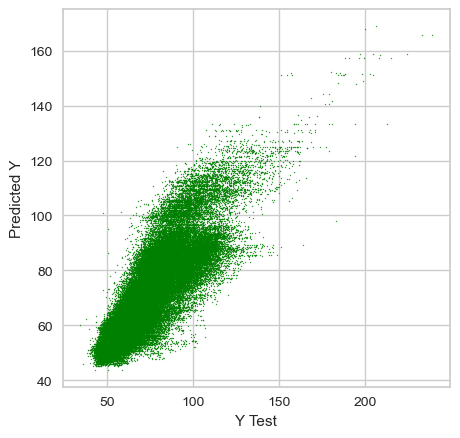


Feature ranking:
1. remaining_lease_years (0.367498)
2. region_Central (0.122463)
3. lease_commence_date (0.100029)
4. floor_area_sqm (0.078654)
5. n_rooms (0.042052)
6. region_North (0.029872)
7. region_West (0.021646)
8. storey_range_max (0.015075)
9. flat_type_3 Room (0.013889)
10. storey_range_min (0.013531)
11. storey_range_avg (0.013468)
12. town_Clementi (0.013035)
13. town_Woodlands (0.012928)
14. town_Jurong West (0.011618)
15. town_Marine Parade (0.011298)
16. flat_type_5 Room (0.009114)
17. flat_model_Standard (0.008182)
18. region_East (0.007804)
19. flat_model_Improved (0.007487)
20. flat_type_4 Room (0.007349)
21. town_Bukit Merah (0.006243)
22. town_Central Area (0.005663)
23. town_Ang Mo Kio (0.005363)
24. town_Geylang (0.005334)
25. flat_type_Executive (0.004637)
26. flat_model_New Generation (0.004471)
27. town_Bishan (0.004466)
28. flat_model_Terrace (0.004381)
29. region_North-East (0.004297)
30. town_Queenstown (0.004269)
31. flat_model_Model A (0.003833)
32. town

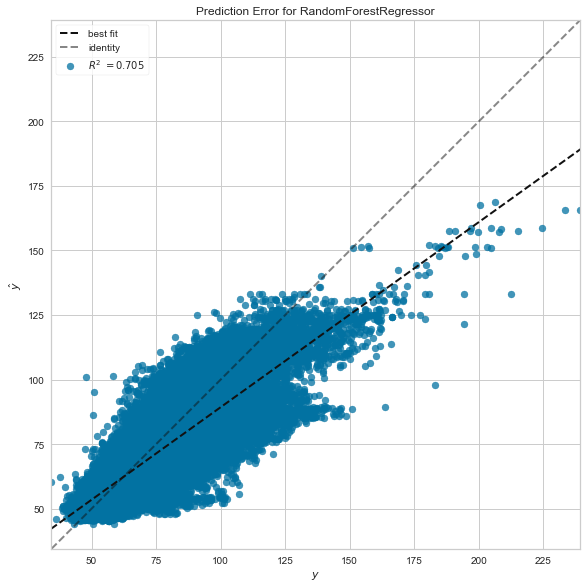

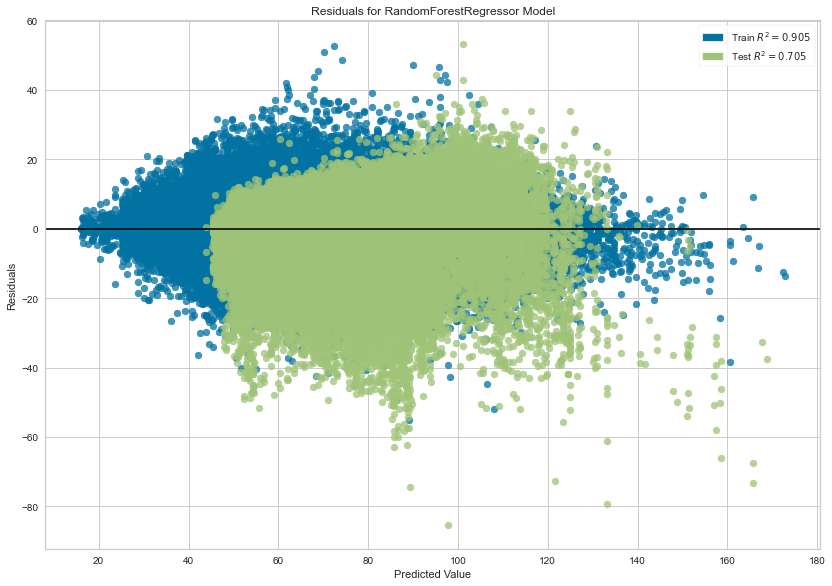


Optimal Hyper-parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 22,
 'max_features': 18,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [108]:
# for v in [2,3,4,5,6,7,8,9,10]:
#     print('----------')
#     print(v)
#     MACH_L_ITERATOR(df_ml_3,v)

MACH_L(df_ml_3)

In [104]:
# flip the model to 80/20 !!!!!!!!!!!!!!!

In [119]:

def MACH_L_80_20(df):
    
    X_initial = df.drop('price_per_sq_m_per_lease_yr_norm', axis=1)
    X = X_initial.values
    
    y = df['price_per_sq_m_per_lease_yr_norm'].values
    
    eighty_percent = 0.8 * len(df)
    
    X_train= X[:round(eighty_percent)]
    X_test = X[round(eighty_percent):]
    
    y_train= y[:round(eighty_percent)]
    y_test = y[round(eighty_percent):]
    
#     rf = RandomForestRegressor(random_state=42, 
#                                verbose=0, 
#                                n_estimators=300,    # locked
#                                bootstrap=True,      # locked
#                                max_depth= 22,       # locked 
#                                max_features= 18,    # locked
#                                min_samples_leaf= 2, # locked
#                                min_samples_split=2, # locked (could be 3,4)
#                                # max_leaf_nodes=max_leaf_nodes, #None,
#                                # comment out  max_samples=None,
#                                # comment out: min_weight_fraction_leaf=0.0,
#                                n_jobs=-1)  
    
    rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               n_estimators=500,    # locked
                               bootstrap=True,      # locked
                               max_depth= 22,       # locked 
                               max_features= 18,    # locked
                               min_samples_leaf= 2, # locked
                               min_samples_split= 3, # locked (could be 3,4)
                               # max_leaf_nodes=max_leaf_nodes, #None,
                               # comment out  max_samples=None,
                               # comment out: min_weight_fraction_leaf=0.0,
                               n_jobs=-1) 
    
    
    rfModel = rf.fit(X_train, y_train)
    
    y_pred_test = rfModel.predict(X_test)
    y_pred_train = rfModel.predict(X_train)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('\n')
    
    plt.figure(figsize = (5,5), dpi=100)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    # Print the feature ranking
    print("\nFeature ranking:")
        
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
                
    visualizer = PredictionError(rfModel, hist=False, size=(1000, 700))
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
    visualizer2 = ResidualsPlot(rfModel, hist=False, size=(1000, 700))
    visualizer2.fit(X_train, y_train)  
    visualizer2.score(X_test, y_test)
    visualizer2.poof()
    
    print('\nOptimal Hyper-parameters:')
    pprint(rfModel.get_params())
    


--- Test Set ---
Mean Absolute Error: ... 6.513701975590843
Mean Squared Error:..... 83.76
RMSE: .................. 9.152047278966531
Coeff of det (R^2):..... 0.772

--- Train Set ---
Mean Absolute Error: ... 3.15539652561295
Mean Squared Error:..... 19.88
RMSE: .................. 4.45867794865445
Coeff of det (R^2):..... 0.905




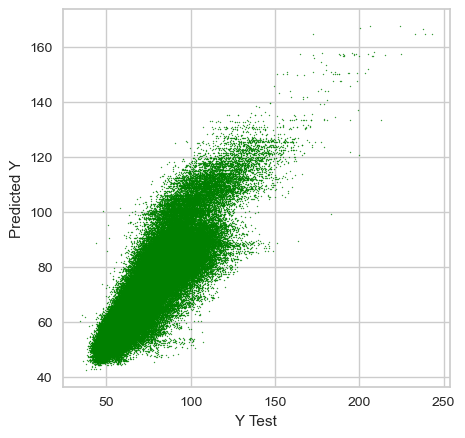


Feature ranking:
1. remaining_lease_years (0.371490)
2. region_Central (0.117437)
3. lease_commence_date (0.098897)
4. floor_area_sqm (0.078343)
5. n_rooms (0.043276)
6. region_North (0.030512)
7. region_West (0.021670)
8. storey_range_max (0.015127)
9. storey_range_min (0.014997)
10. flat_type_3 Room (0.014387)
11. town_Clementi (0.013228)
12. storey_range_avg (0.013043)
13. town_Woodlands (0.012508)
14. town_Jurong West (0.012204)
15. town_Marine Parade (0.011073)
16. flat_model_Standard (0.008289)
17. flat_type_5 Room (0.008191)
18. flat_type_4 Room (0.007746)
19. region_East (0.007682)
20. flat_model_Improved (0.007332)
21. town_Bukit Merah (0.006207)
22. town_Central Area (0.005626)
23. town_Geylang (0.005373)
24. town_Ang Mo Kio (0.005205)
25. flat_type_Executive (0.004430)
26. town_Queenstown (0.004411)
27. flat_model_New Generation (0.004306)
28. flat_model_Terrace (0.004306)
29. region_North-East (0.004291)
30. town_Bishan (0.004075)
31. flat_model_Model A (0.003757)
32. town

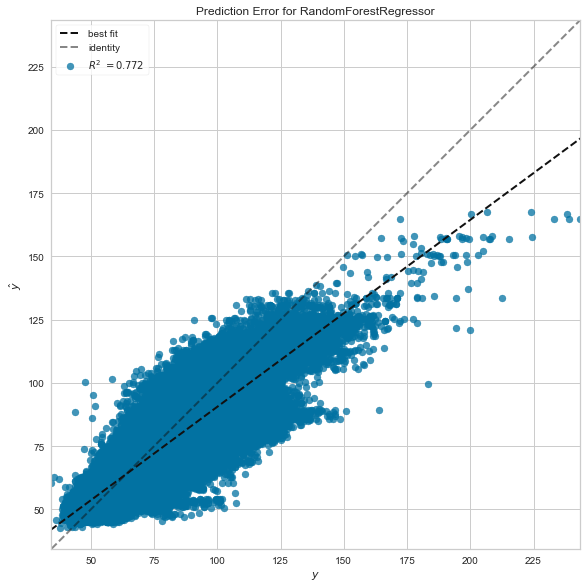

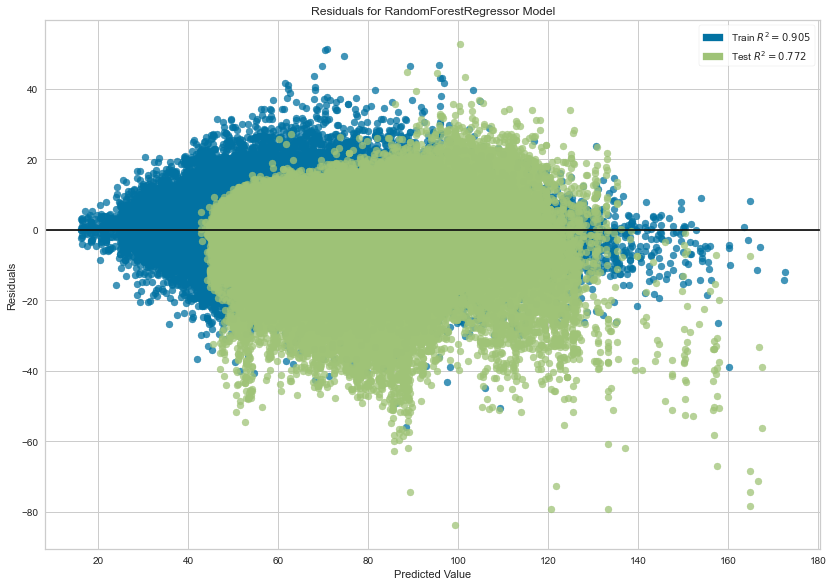


Optimal Hyper-parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 22,
 'max_features': 18,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [120]:
# for v in [2,3,4,5,6,7,8,9,10]:
#     print('----------')
#     print(v)
#     MACH_L_ITERATOR(df_ml_3,v)

MACH_L_80_20(df_ml_3)